En ocasiones es útil re-establecer los nombres de las librerías importadas y de las variables usadas sin reiniciar el kernel de Jupyter. El siguiente comando elimina todas las variables definidas y librerías imporradas hasta ahora (limpia el "namespace").

In [1]:
import numpy as np
np.ones((1,3))

array([[1., 1., 1.]])

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Nota:**
- No se reinicia la cuenta de inputs en el notebook. 
- El símbolo `%`, cuando se resalta en morado, indica que se utiliza un comando especial. A estos comandos se les llama "magias" en Jupyter. Puedes ver más "comandos mágicos" [aquí](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/).

In [4]:
np.ones((1,3))

NameError: name 'np' is not defined

In [232]:
import tensorflow as tf
print(tf.__version__)

1.13.1


Recordamos la forma básica en la que se definen arreglos de numpy para compararlos con los de tensorflow.

In [7]:
#numpy arrays 
import numpy as np

np1=np.array([1,1]) #vectors
np2=np.array([2,2,3])
np3=np.array([[1,1]]) #1x2 matrix
np4=np.array([[1,2,3],[4,5,6]]) #2x3 matrix
lista=[np1,np2,np3,np4]

for (i,array) in enumerate(lista):
    print("np%d" %i,"=",array,"\t size=",array.size,"\t shape=",array.shape,"\t type=",type(array))
    
print("\n Operaciones con Arrays")
print("zeros= \t",np.zeros([2,3]))
print("ones= \t",np.ones([3,2]))
print("\n multiplication= \t",np.matmul(np3,np4))

np0 = [1 1] 	 size= 2 	 shape= (2,) 	 type= <class 'numpy.ndarray'>
np1 = [2 2 3] 	 size= 3 	 shape= (3,) 	 type= <class 'numpy.ndarray'>
np2 = [[1 1]] 	 size= 2 	 shape= (1, 2) 	 type= <class 'numpy.ndarray'>
np3 = [[1 2 3]
 [4 5 6]] 	 size= 6 	 shape= (2, 3) 	 type= <class 'numpy.ndarray'>

 Operaciones con Arrays
zeros= 	 [[0. 0. 0.]
 [0. 0. 0.]]
ones= 	 [[1. 1.]
 [1. 1.]
 [1. 1.]]

 multiplication= 	 [[5 7 9]]


In [233]:
np.ones([1])

array([1.])

# Gráficas y Sesiones

Tensorflow utiliza un estilo de **programación declarativo**, lo que significa que tenemos que primero definir las variables a utilizar y las operaciones a realizar entre ellas. Esto nos da los elementos principales de Tensorflow:

- La declaración de variables y operaciones: Estas definen una **gráfica de operaciones (Data Flow Graph)** que representa las relaciones y dependencias entre las variables.
- La ejecución de variables y operaciones: Se lleva a cabo dentro de una **Sesión** en donde se destinan recursos de computo para realizar las operaciones establecidas en la gráfica.

La estructura fundamental de un programa en Tensorflow es de bajo nivel, i.e. se deben definir y declarar explícitamente las operaciones (low-level API). Sin embargo, existen módulos (como Keras) que utilizan funciones de más alto nivel y "esconden" la gŕafica de operaciones al usuario (high-level API).

En el caso de bajo nivel, la estructura básica de un programa en Tensorflow es la siguiente:

In [236]:
# Construye una gráfica de operaciones
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b

# Ejecuta la gráfica en una sesión
sess = tf.Session()
print(sess.run(c)) # Evalua el valor de c
sess.close()

30.0


Empezaremos con las gráficas. Cada variable u operación que definamos se añade por defecto a la gráfica de operaciones de Tensorflow. Esta se puede visualizar con herramientas como Tensorboard. Cada operación de la gráfica se puede asignar explícitamente a un dispositivo para procesarse. Esto permite realizar cálculos en distintos procesadores e incluso distinto equipos.

Esta es la visualización de una gráfica de operaciones generada en Tensorboard.

<img src="https://www.tensorflow.org/images/tensors_flowing.gif" width=400>

**Nota:** Las variables también pueden pensarse como operaciones que añaden un nodo a la gráfica (nodos externos), por lo que a veces se les llaman operaciones.

Internamente, es necesario que las operaciones tengan nombres únicos en la gráfica, aunque esto no es igual a los nombres que declaramos en Python.

In [234]:
c_0 = tf.constant(0, name="c")  # => llamar a la operación "c"

#a los mismos nombres se les añade un índice para diferenciarlos
c_1 = tf.constant(2, name="c")  # => llamar a la operación "c_1"


# Podemos definir ámbitos que añaden prefijos a las operaciones en ese contexto
with tf.name_scope("outer"):
    c_2 = tf.constant(2, name="c")  # => llamar a la operación "outer/c"

    # los ámbitos pueden formar estructuras similares a un sistema de archivos
    with tf.name_scope("inner"):
        c_3 = tf.constant(3, name="c")  # => llamar a la operación "outer/inner/c"

    #podemos cambiar de ámbito, pero se mantienen los que creamos antes
    c_4 = tf.constant(4, name="c")  # => llamar a la operación "outer/c_1"
    
    with tf.name_scope("inner"):
        c_5 = tf.constant(5, name="c")  # => llamar a la operación "outer/inner_1/c"


Las operaciones que definimos se asignan por defecto a la gráfica predeterminada. Para ver las operaciones en la gráfica utilizamos `get_operations()`.

In [237]:
g = tf.get_default_graph()
print(type(g.get_operations()))
g.get_operations()

<class 'list'>


[<tf.Operation 'zeros' type=Const>,
 <tf.Operation 's_weights' type=VariableV2>,
 <tf.Operation 's_weights/Assign' type=Assign>,
 <tf.Operation 's_weights/read' type=Identity>,
 <tf.Operation 'zeros_1' type=Const>,
 <tf.Operation 's_biases' type=VariableV2>,
 <tf.Operation 's_biases/Assign' type=Assign>,
 <tf.Operation 's_biases/read' type=Identity>,
 <tf.Operation 'save/filename/input' type=Const>,
 <tf.Operation 'save/filename' type=PlaceholderWithDefault>,
 <tf.Operation 'save/Const' type=PlaceholderWithDefault>,
 <tf.Operation 'save/SaveV2/tensor_names' type=Const>,
 <tf.Operation 'save/SaveV2/shape_and_slices' type=Const>,
 <tf.Operation 'save/SaveV2' type=SaveV2>,
 <tf.Operation 'save/control_dependency' type=Identity>,
 <tf.Operation 'save/RestoreV2/tensor_names' type=Const>,
 <tf.Operation 'save/RestoreV2/shape_and_slices' type=Const>,
 <tf.Operation 'save/RestoreV2' type=RestoreV2>,
 <tf.Operation 'save/Assign' type=Assign>,
 <tf.Operation 'save/Assign_1' type=Assign>,
 <tf.Op

In [11]:
print(g.get_operations()[0]) #internamente, las operaciones son una lista de abributos

name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: 5.0
    }
  }
}



**Advertencia:** Observamos que se incluyen las operaciones que definimos en la primera celda, i.e. se siguen añadiendo indefinidamente. Esto puede causar conflictos cuando ejecutamos una operación que genera un error, pues el error puede aparecer aún si ejecutamos otras operaciones en la misma gráfica. Por esta razón es buena idea definir o limitar el ámbito en el que se le asignan operaciones de la gráfica. Hay varias formas de hacer esto:

1. Re-establecer la gráfica

In [238]:
tf.reset_default_graph()
g = tf.get_default_graph()
g.get_operations()

[]

2. Definir un ámbito donde la gráfica es la predeterminada

In [239]:
g_1 = tf.Graph()
with g_1.as_default():
    c = tf.constant("Nodo en g_1",name="c") #se añade la operación a g_1

    sess_1 = tf.Session() #en este ámbito, por defecto, las sesiones ejecutan las operaciones de g_1

g_2 = tf.Graph()
with g_2.as_default():
    d = tf.constant("Nodo en g_2",name="d") #se añade la operación a g_2

    sess_2 = tf.Session() #en este ámbito, por defecto, las sesiones ejecutan las operaciones de g_2

In [240]:
print(g_1.get_operations())
print(c.graph is g_1) #la operación c pertenece a g_1
print(sess_1.graph is g_1) #la gráfica predeterminada para la sesión sess_1 es g_1

print(g_2.get_operations())
print(d.graph is g_2) #la operación d pertenece a g_2
print(sess_2.graph is g_2) #la gráfica predeterminada para la sesión sess_2 es g_2

[<tf.Operation 'c' type=Const>]
True
True
[<tf.Operation 'd' type=Const>]
True
True


3. Definir un ámbito para la gráfica y asignarla explícitamente a una sesión 

In [241]:
g_1 = tf.Graph()
with g_1.as_default():
    c = tf.constant("Nodo en g_1",name="c") #se añade la operación a g_1


sess_1 = tf.Session(graph=g_1)
print(sess_1.run(c))
#print(sess_1.run(d)) #esto falla ya que d no pertenece a g1
#print(sess_2.run(c)) #esto falla porque se está usando sess_1 no sess_2
sess_1.close()

b'Nodo en g_1'


4. "Finalizar" la gráfica, i.e. evitar que se le puedan añadir más operaciones

In [242]:
print(g_2.get_operations())
g_2.finalize()

with g_2.as_default():
    d = tf.constant("Nodo en g_2",name="d") #trata de añadir d_2 a g_2 pero falla

[<tf.Operation 'd' type=Const>]


RuntimeError: Graph is finalized and cannot be modified.

**Obs.** Las observaciones siguen ahí a pesar de haber cerrado el ámbito. ¿Cómo reestablecemos g_1?

In [243]:
g_1.get_operations()

[<tf.Operation 'c' type=Const>]

In [244]:
with g_1.as_default():
    tf.reset_default_graph() #esto no funciona, se debe hacer fuera de cualquier ámbito o sesión
    print(g_1.get_operations()) 

AssertionError: Do not use tf.reset_default_graph() to clear nested graphs. If you need a cleared graph, exit the nesting and create a new graph.

Símplemente la definimos nuevamente:

In [245]:
print(g_1.get_operations())
g_1 = tf.Graph()
print(g_1.get_operations())

[<tf.Operation 'c' type=Const>]
[]


**Nota:** Es común utilizar una gráfica para definir las operaciones de entrenamiento y una diferente para evaluación (validación y prueba) o predicción con datos individuales.

Una vez creada la gráfica de operaciones debemos ejecutarla de manera separada. Para esto se utilizan las **sesiones**. Hay distintas maneras de crear una sesión:

1. tf.Session y sess.close

In [246]:
sess1=tf.Session(config=tf.ConfigProto(log_device_placement=True,allow_soft_placement=True)) 
#log_device_placement=True imprime en la terminal el dispositivo donde se lleva a cabo cada operación
#allow_soft_placement=True asigna automáticamente las operacionas a CPU cuando no pueden correrse en GPU
print("1: tf.Session y tf.close \n",sess1.run(tf.zeros([2,3])))
sess1.close()

1: tf.Session y tf.close 
 [[0. 0. 0.]
 [0. 0. 0.]]


2. Interactive Session

In [21]:
sess2=tf.InteractiveSession()
print("2: Interactive Session",sess2.run(tf.constant([1,2,3],shape=[1,3])))
#crea una sesión y la define como la sesión predeterminada
print(tf.get_default_session() is sess2)
sess2.close()

#sess2.run(tf.zeros([2,3])) #falla dado que la sesión está cerrada

2: Interactive Session [[1 2 3]]
True


3. Ámbito con with tf.Session()

In [247]:
with tf.Session() as sess3: #abre una sesión, ejecuta el código identado y luego la cierra automáticamente
    #al igual que Interactive Session, se define como predeterminado
    print(tf.get_default_session() is sess3)
    
    test=tf.placeholder(tf.float32)
    print("3: with tf.Session \n",test.eval(feed_dict={test:3})) 
    resultado=sess3.run(tf.zeros([2,3]))
    print(resultado)
    
#sess3.run(tf.zeros([2,3])) #falla dado que la sesión está cerrada
print("Las variables que definimos en la sesión permanecen cuando se cierra:")
print(resultado)

True
3: with tf.Session 
 3.0
[[0. 0. 0.]
 [0. 0. 0.]]
Las variables que definimos en la sesión permanecen cuando se cierra:
[[0. 0. 0.]
 [0. 0. 0.]]


Una sesión cerrada ya no es la predeterminada

In [248]:
print(tf.get_default_session() is sess1)
print(tf.get_default_session() is sess2)
print(tf.get_default_session() is sess3)

False
False
False


Pero aún así se mantiene la información de las gráficas que se ejecutaron en la sesión

In [249]:
sess1.graph.get_operations()

[<tf.Operation 'zeros' type=Const>,
 <tf.Operation 'Placeholder' type=Placeholder>,
 <tf.Operation 'zeros_1' type=Const>]

In [25]:
sess1.graph_def

node {
  name: "zeros"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
          dim {
            size: 3
          }
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
          dim {
            size: 3
          }
        }
        tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
      }
    }
  }
}
node {
  name: "Placeholder"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        unknown_rank: true
      }
    }
  }
}
node {
  name: "zeros

Notemos que las operaciones se acumulario al no haber limitado la gráfica

In [250]:
g=tf.get_default_graph()
print(g.get_operations())
tf.reset_default_graph()

[<tf.Operation 'zeros' type=Const>, <tf.Operation 'Placeholder' type=Placeholder>, <tf.Operation 'zeros_1' type=Const>]


# Escalares y Tensores  

Ahora veremos los distintos tipos de variables que se utilizan en tensorflow. La librería define sus propios tipos de escalares y arreglos multidimensionales. Estos últimos son llamados tensores. Ambos son muy similares a los que existen en numpy. 

<img src="images/tf_data_types.png">

In [251]:
import numpy as np
tf.int64 == np.int64 , tf.complex64==np.complex64

(True, True)

In [252]:
type(tf.int64),type(np.int64)

(tensorflow.python.framework.dtypes.DType, type)

A sí mismo, existen varios tipos de tensores. Veremos los más importantes.

Los tensores **constantes** tienen valores fijos y no pueden modificarse durante la ejecución. En la sesión se ejecutan mediante `sesss.run`.

In [255]:
#tf constants

g_1 = tf.Graph()
with g_1.as_default():

    a0 = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a') #matriz 2x3
    b0 = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b') #matriz 3x2
    c0 = tf.matmul(a0, b0) #matriz 2x2
    d0 = tf.matmul(b0,a0) #matriz 3x3
    #e0 = tf.matmul(d0,c0) regresa un error de dimensiones, incluso si no se ejecuta en la sesion
    f0 = tf.zeros([2,3]) #matriz de ceros de 2x3
    
    k0=tf.constant(1) #escalar 1
    l0=tf.constant(2) #escalar
    m0=tf.constant(1j,dtype=tf.complex128)
    p0=tf.multiply(l0,k0)
    #q0=tf.multiply(l0,m0) #regresa error de tipo, ambos factores deben ser del mismo tipo
    r0=tf.multiply(m0,m0)
    
    print(a0) #contiene únicamente el nombre y el tipo de variable que es, los valores se obtienen con sess1.run 
    print(b0)
    print()

print("------------------using with context ----------------------------")
with tf.Session(graph=g_1) as sess1:
    print("a0=",sess1.run(a0))
    print("b0=",sess1.run(b0))
    print()
    print("c0=a0*b0= \n",sess1.run(c0)) #(2x3)*(3x2)=(2x2)
    print("d0=b0*a0= \n",sess1.run(d0)) #(3x2)*(2x3)=(3x3)
    print()
    print("f0=",sess1.run(f0))
    print()
    print("p0=",sess1.run(p0)) #integer constant
    print("r0=",sess1.run(r0))
    
    print()
    print("Los tensores cambian de tipo al evaluarlos:")
    print("c0 es:",type(c0),"pero c0.eval es",type(c0.eval()))
    print("\n shape:",c0.shape,"\n rank:",tf.rank(c0))
    
    
    print("\n Podemos también ejecutar código normal dentro de la sesión:")
    print(1+1)
    1+1

Tensor("a:0", shape=(2, 3), dtype=float32)
Tensor("b:0", shape=(3, 2), dtype=float32)

------------------using with context ----------------------------
a0= [[1. 2. 3.]
 [4. 5. 6.]]
b0= [[1. 2.]
 [3. 4.]
 [5. 6.]]

c0=a0*b0= 
 [[22. 28.]
 [49. 64.]]
d0=b0*a0= 
 [[ 9. 12. 15.]
 [19. 26. 33.]
 [29. 40. 51.]]

f0= [[0. 0. 0.]
 [0. 0. 0.]]

p0= 2
r0= (-1+0j)

Los tensores cambian de tipo al evaluarlos:
c0 es: <class 'tensorflow.python.framework.ops.Tensor'> pero c0.eval es <class 'numpy.ndarray'>

 shape: (2, 2) 
 rank: Tensor("Rank:0", shape=(), dtype=int32)

 Podemos también ejecutar código normal dentro de la sesión:
2


Los **placeholders** son tensores constantes a los que les podemos asignar un valor dado durante la ejecución. Esto se hace medidante la función `feed_dict`, donde los valores se le pasan a la operación final de la gráfica mediante un diccionario. Cuando se define la gráfica, únicamente debemos especificar el tipo y forma del placeholder.

In [256]:
#tf placeholders
g_2 = tf.Graph()
with g_2.as_default():

    p=tf.placeholder(tf.float32) # se pueden definir fuera de la sesión
    s=tf.constant(3)
    
with tf.Session(graph=g_2) as sess2:
    q = tf.placeholder(tf.float32) #se pueden definir dentro de la sesión
    t = p + q + 1.5
    print("t=",sess2.run(t,feed_dict={p:2.0,q:1.0})) # Le introducimos los valores de cada placeholder
    
    #también se puede usar la función eval()
    #t.eval()  # Esto dará un error ya que no le pasamos ningún valor a los placeholders
    print("t=",t.eval(session=sess2,feed_dict={p:2.0,q:1.0}))  
    print("s=",s.eval(session=sess2)) #se usar eval con constnates
    print("s=",s.eval()) #usa la sesión predeterminada

t= 4.5
t= 4.5
s= 3
s= 3


**Nota.** `t.eval(session=tf.Session())` es equivalente a `tf.Session().run(t)`. La diferencia es que `run` puede calcular más de un valor a la vez.

In [257]:
tf.reset_default_graph()

t = tf.constant(42.0)
u = tf.constant(37.0)
tu = tf.multiply(t, u)
ut = tf.multiply(u, t)
with tf.Session() as sess:
    tu.eval()  # runs one step
    ut.eval()  # runs one step
    sess.run([tu, ut])  # evaluates both tensors in a single step

In [32]:
#otro ejemplo
tf.reset_default_graph()

a= tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b= tf.placeholder(shape=[2,3],dtype=tf.float64)

with tf.Session() as sess:
    #sess.run(b) #esto da un error ya que no le pasamos valores al placeholder b
    print("b=",b.eval(session=sess,feed_dict={b:np.zeros((2,3))})) #success

    #b.eval(session=sess,feed_dict={b:a}) #da un error ya que no se le pueden pasar tensores explícitos
    print("b=",b.eval(session=sess,feed_dict={b:a.eval()})) #sí se puede si evaluamos el tensor primero

b= [[0. 0. 0.]
 [0. 0. 0.]]
b= [[1. 2. 3.]
 [4. 5. 6.]]


Finalmente están los tensores **variables**. Estos tienen una forma fija pero, a diferencia de los otros tensores, sus valores pueden cambiar. Requieren tener valores iniciales al definirlos y, además, utilizar una función de inicialización. Estos son los tensores que se derivan para calcular el gradiente de la funciones de error con funciones como `GradientDescentOptimizer`.

In [260]:
#tf variables

g_3 = tf.Graph()
with g_3.as_default():
    a=tf.Variable(7, tf.int32)
    init_all_vars=tf.initializers.global_variables() #esto inicializa todas las variables de la gráfica

with tf.Session(graph=g_3) as sess3:
    #print(sess.run(a)) #esto da un error pues a debe inicializarse primero
    init_all_vars.run() 
    print(sess3.run(a))

7


In [34]:
a = tf.add(tf.Variable(1, name="a"), 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print (a.eval())

2


In [44]:
tf.reset_default_graph()

with tf.Graph().as_default():
    a = tf.Variable(1, name="a")
    a = tf.assign(a, tf.add(a,1)) #esto sólo sirve para variables
    b = a+1
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("b=",b.eval())
        print ("a=",a.eval())
        print ("a=",a.eval())
        print ("a=",a.eval())

b= 3
a= 3
a= 4
a= 5


# Asignar Operaciones a Distintos Dispositivos

Podemos ver la lista de dispositivos disponibles para ejecutar el código:

In [261]:
from tensorflow.python.client import device_lib

devices=device_lib.list_local_devices()
print(type(devices),len(devices),"\n")

for dev in devices:
    print(dev)

<class 'list'> 2 

name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11305996268362161643

name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2275125074210327864
physical_device_desc: "device: XLA_CPU device"



**Nota:** XLA (Accelerated Linear Algebra) es un compilador que utiliza tensorflow para hacer más eficientes los cálculos de álgebra lineal. En este caso, `XLA_CPU` y `XLA_GPU` denota que se pueden utilizar estos dispositivos con ese compilador, pero cuenta como un dispositivo adicional. Puedes leer más al respecto [aquí](https://www.tensorflow.org/xla/overview).

Con esto podemos asignar explícitamente el dispositivo en el que se ejecutará cada operación en la gráfica y paralelizar nuestro código.

In [262]:
tf.reset_default_graph()

with tf.device('/device:CPU:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c = tf.matmul(a, b,name='c')

with tf.device('/device:XLA_CPU:0'): #no importa si los nombres son los mismos (los diferencía automáticamente)
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c = tf.matmul(a, b,name='c')
    
with tf.Session() as sess:
    print(sess.run(c)) # Ejecuta la operación en el CPU
    print(sess.run(c)) # Ejecuta la operación en el XLA_CPU

[[22. 28.]
 [49. 64.]]
[[22. 28.]
 [49. 64.]]


Podemos revisar si está habilitado el uso de GPU con CUDA:

In [263]:
tf.test.is_built_with_cuda()

False

In [264]:
tf.test.gpu_device_name()

''

In [265]:
tf.reset_default_graph()

with tf.device('/device:GPU:0'):  #este comando falla si no se tiene la versión de GPU de tensorflow
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b,name="c")

# Crea una sesión que imprimirá el dispositivo en el que se ejecuta el código
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(sess.run(c)) # Ejecuta la operación
sess.close()

InvalidArgumentError: Cannot assign a device for operation c: node c (defined at <ipython-input-265-bb36d7f31612>:6) was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0 ]. Make sure the device specification refers to a valid device. The requested device appears to be a GPU, but CUDA is not enabled.
	 [[node c (defined at <ipython-input-265-bb36d7f31612>:6) ]]

Caused by op 'c', defined at:
  File "/home/arturo/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/arturo/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/arturo/anaconda3/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/home/arturo/anaconda3/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/home/arturo/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-265-bb36d7f31612>", line 6, in <module>
    c = tf.matmul(a, b,name="c")
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py", line 2455, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_math_ops.py", line 5333, in mat_mul
    name=name)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Cannot assign a device for operation c: node c (defined at <ipython-input-265-bb36d7f31612>:6) was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0 ]. Make sure the device specification refers to a valid device. The requested device appears to be a GPU, but CUDA is not enabled.
	 [[node c (defined at <ipython-input-265-bb36d7f31612>:6) ]]


También `tf.device` se puede utilizar para correr operaciones en equipos remotos a los que se tiene acceso. El siguiente es un código ilustrativo, pero puedes revisar más acerca del tema [aquí](https://github.com/tensorflow/examples/blob/master/community/en/docs/deploy/distributed.md). 

In [ ]:
with tf.Session("grpc://worker7.example.com:2222") as sess:
    for i in range(1000):
        sess.run(train_op)

# Operaciones con Tensorflow

Los tensores tienen 2 propiedades: forma y rango (análogos a forma y dimensión de numpy). Cuando hagamos operaciones entre ellos debemos asegurarnos que las operaciones sean consistentes con estas propiedades.

In [267]:
tf.reset_default_graph()

t1 = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
t2 = tf.ones(shape=[3,2])
t3 = tf.placeholder(tf.float32, [None, 1]) #usar none en un placeholder le permite adaptarse al número de datos

r1=tf.rank(t1)
r2=tf.rank(t2)
r3=tf.rank(t3)
print(r1) # es un escalar en sí mismo

d1=tf.shape(t1)
d2=tf.shape(t2)
d3=tf.shape(t3)
print(d1) #es un vector

print("\n Comparar Rangos y Formas")
with tf.Session() as sess:
    print("Rangos:")
    print(sess.run([r1,r2,r3],feed_dict={t3:np.zeros((100,1))}))
    print()
    
    print("Formas:")
    print(sess.run([d1,d2,d3],feed_dict={t3:np.zeros((20,1))}))

Tensor("Rank:0", shape=(), dtype=int32)
Tensor("Shape:0", shape=(3,), dtype=int32)

 Comparar Rangos y Formas
Rangos:
[3, 2, 2]

Formas:
[array([2, 2, 3], dtype=int32), array([3, 2], dtype=int32), array([20,  1], dtype=int32)]


Para el caso de redes neuronales, es importante saber operar matrices y vectores. Hay 2 propiedades útiles que podemos utilizar.

1. La expresión $\mathbf{W} \mathbf{x} + \mathbf{b}$ corresponde a evaluar un único dato $\mathbf{x}$. Podemos evaluar una serie de datos $\mathbf{X}$ en paralelo con la expresion:  

$$\mathbf{W} \mathbf{X} + \mathbf{b},$$

donde estamos asumiendo que los datos $\mathbf{x}_i$ son las columnas de la matriz $\mathbf{X}$.

2. Resulta que podemos sumar una matriz con un vector. Por defecto, al evaluar una operación de la forma $\mathbf{M} + \mathbf{v}$, tensorflow suma las componentes del vector $v$ a cada columna de la matriz $M$, i.e. si $\mathbf{M}=(\mathbf{m}_1,\mathbf{m}_2,...,\mathbf{m}_n)$,donde $\mathbf{m}_1,\mathbf{m}_2,...,\mathbf{m}_n$ son los vectores que forman las columnas de $\mathbf{M}$, entonces:

$$\mathbf{M}+\mathbf{v}=(\mathbf{m}_1+\mathbf{v},\mathbf{m}_2+\mathbf{v},...,\mathbf{m}_n+\mathbf{v}).$$

A esta operación se le conoce como **broadcasting**.

**Nota:** En la librería no se puede transponer un vector (1-Dimensión), por lo que para hacer una suma horizontal en la matriz (sobre los vectores fila) debes transponer la matriz, sumar y transponer de nuevo.

In [269]:
tf.reset_default_graph()

M=tf.ones((3,2))
v1=tf.constant([1.,2.],shape=[2])
v2=tf.constant([1.,2.,3.],shape=[3])
sum1=v1+M
sum2=tf.transpose(v2+tf.transpose(M))
sum3=tf.add(v1,M) #igual que 1, sumar v2 mandaría error porque se hace sobre la otra dimensión (columnas) 


with tf.Session() as sess:
    print("M=",sess.run(M))
    print("v1=",sess.run(v1))
    print("v2=",sess.run(v2))
    print("shapes:",v1.shape,M.shape)
    
    
    print("\n--------------------")
    print("s1=",sess.run(sum1),"\n s2=",sess.run(sum2),"\n s3=",sess.run(sum3))

M= [[1. 1.]
 [1. 1.]
 [1. 1.]]
v1= [1. 2.]
v2= [1. 2. 3.]
shapes: (2,) (3, 2)

--------------------
s1= [[2. 3.]
 [2. 3.]
 [2. 3.]] 
 s2= [[2. 2.]
 [3. 3.]
 [4. 4.]] 
 s3= [[2. 3.]
 [2. 3.]
 [2. 3.]]


**Softmax:** $f_i(\mathbf{x})=\frac{e^{x_i}}{\sum_{k=0}^N e^{x_k}}$. Se utiliza para normalizar las salidas de una capa de neuronas,típicamente en la capa de salida. Tiene la ventaja de que nunca resultará en valor cero o indeterminado.

Tensorflow aplica la normalización a lo largo de un eje en específico (por defecto el último).

In [270]:
#softmax normalization on matrices
tf.reset_default_graph()

A=tf.constant([1.,1.],shape=[1,2])
B=tf.constant([1.,1.],shape=[2,1])

with tf.Session() as sess:
    print("A=",A.eval(),"\n B=",B.eval())
    
    print("Normalizar con Softmax")
    print("A:",tf.nn.softmax(A).eval())
    print("B:",tf.nn.softmax(B).eval())
    print("A:",tf.nn.softmax(A,axis=0).eval())
    print("B:",tf.nn.softmax(B,axis=0).eval())

A= [[1. 1.]] 
 B= [[1.]
 [1.]]
Normalizar con Softmax
A: [[0.5 0.5]]
B: [[1.]
 [1.]]
A: [[1. 1.]]
B: [[0.5]
 [0.5]]


**Cross-Entropy:** $H(P,Q)=\mathbb{E}_{x\sim P}[-logQ(x)]=-\sum_i P(x_i)logQ(x_i)$

La entropía cruzada es una forma de comparar dos distribuciones distintas $P$ y $Q$. 

Recordamos que, dado un evento aleatorio $x$ producido por una distribución de probabilidad $P(x)$, $log\frac{1}{P(x)}$ se refiere a la información (mínima) que representa un evento y la entropía $H(P)=\mathbb{E}_{x\sim P}[-logP(x)]$ es la información promedio (mínima) que representa un evento.

Si tenemos una distribución de probabilidad $Q$ que aproxima $P$, entonces $H(P,Q)=\mathbb{E}_{x\sim P}[-logQ(x)]$ representa el promedio de información según $P$ que representa un evento generado por una distribución $Q$.

Se puede demostrar que $H(P,Q)\geq H(P,P)=H(P)$, por lo que la entropía cruzada tiene un límite inferior (la entropía misma) que ocurre cuando ambas distribuciones son iguales.[[link]](https://stats.stackexchange.com/questions/370428/why-is-the-cross-entropy-always-more-than-the-entropy) Esto nos permite utilizar la entropía cruzada como una función de error a minimizar cuando comparamos las etiquetas u objetivos reales $Y_{\text{actual}}$ con la predicción $Y_{\text{predicted}}$. 

Consideremos el caso de clasificación: 

<img src="images/one-hot2.png" width=500>

<img src="images/cropped-cross-entropy.png" width=500>

$Y_{\text{actual}}$ es un vector que representa la clase de un punto $\mathbf{x}$, con $Y_{i\ \text{actual}}=\delta_i$ i.e. la entrada i-ésima es 1 si $\mathbf{x}$ pertenece a la clase $i$ y es 0 si no es así. A esta representación se le conoce como **one-hot encoding**. 

Por otro lado $Y_{i\ \text{predicted}}$ representa la probabilidad de que $\mathbf{x}$ pertenezca a la i-esima clase. Entonces, la entropía cruzada será mínima cuando ambos vectores sean iguales, i.e. tengan la misma distribución de las probabilidades.

**Obs:** Por esta razón, las etiquetas corresponden a la probabilidad real $P$ y deben estar fuera del logaritmo, ya que contienen ceros en sus entradas.

<img src="https://cdn-images-1.medium.com/max/1600/1*UMTxO9QtlttfKWGd-RciTQ.png">

Tensorflow implementa la función `softmax_cross_entropy` que es más eficiente que calcular la entropía cruzada por sí misma, pero también podemos calcular la función por nuestra propia cuenta.

In [272]:
tf.reset_default_graph()

y_act=tf.constant([1.0,0.0,0.0])
y_pred=tf.constant([0.7,0.2,0.1])

norm_y=tf.nn.softmax(y_pred)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_act * tf.log(norm_y), reduction_indices=[0]))

sm_ce=tf.nn.softmax_cross_entropy_with_logits(labels=y_act,logits=y_pred)

with tf.Session() as sess:
    print(sess.run(norm_y))
    print(sess.run([cross_entropy,sm_ce]))

[0.46396342 0.28140804 0.25462854]
[0.7679496, 0.7679496]


Finalmente, utilizaremos las funciones `equal` y `argmax` para obtener la precisión de las predicciones.

In [181]:
tf.reset_default_graph()

argmax=tf.argmax(tf.constant([1,2,7,8,-3,2,4,3],shape=[2,4]),axis=1) #indices donde los valores son máximos, sobre eje 1
equal=tf.equal(tf.constant([1,2,3]),tf.constant([3,2,1])) #regresa un tensor booleano
cast=tf.cast(np.array([True,False]),tf.float32) #convierte el tensor booleano 1's and 0's

with tf.Session() as sess:
    print(sess.run(argmax),type(sess.run(argmax)),sess.run(argmax).shape)
    print(sess.run(equal),type(sess.run(equal)),sess.run(equal).shape)
    print(sess.run(cast))

[3 2] <class 'numpy.ndarray'> (2,)
[False  True False] <class 'numpy.ndarray'> (3,)
[1. 0.]


# Nuestra Primer Red Neuronal: Una sola capa

Para esto utilizaremos la base de datos "MNIST Dataset" (Modified National Institute of Standards and Technology Dataset), la cual consiste en 70,000 imagenes monocromáticas de 28x28 pixeles de dígitos numéricos escritos a mano. 60,000 imagenes pertenecen al conjunto de entrenamiento y 10,000 al de prueba. Es uno de los conjuntos de datos más famosos en Deep Learning, por lo que se han publicado un gran número de artículos con diferentes algoritmos de entrenamiento. Los creadores originales tienen una página en la que comparan los distintos métodos existentes y sus respectivos errores. [[link]](http://yann.lecun.com/exdb/mnist/)

In [273]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [274]:
X_train, Y_train, X_test, Y_test=mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

In [275]:
X_train.shape, Y_train.shape, X_test.shape,  Y_test.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

La implementación que estamos utilizando tiene sólo 55,000 dato en entrenamiento. La razón es que se dividieron 5,000 datos para validación.

In [211]:
X_val,Y_val=mnist.validation.images,mnist.validation.labels

In [212]:
X_val.shape,Y_val.shape

((5000, 784), (5000, 10))

Exploremos los datos:

In [276]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [277]:
print(X_train[0].shape) #784=28*28

(784,)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


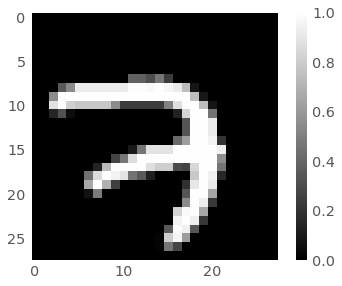

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


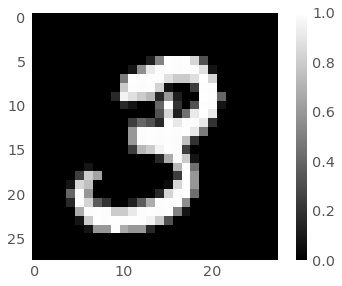

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


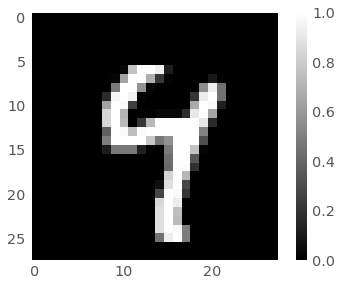

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


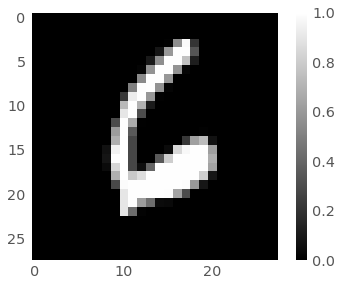

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


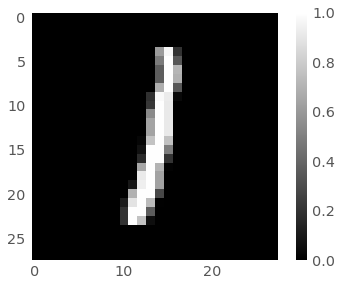

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


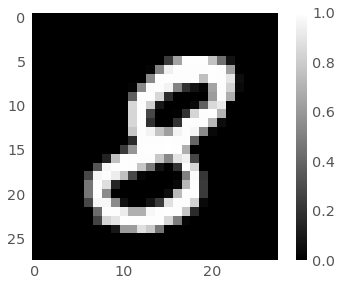

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


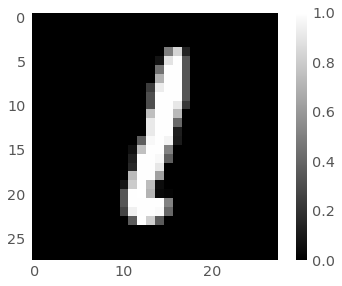

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


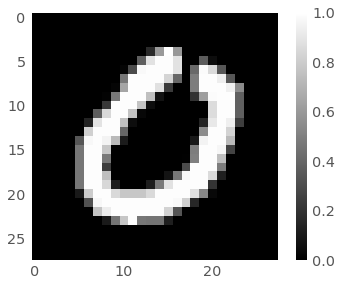

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


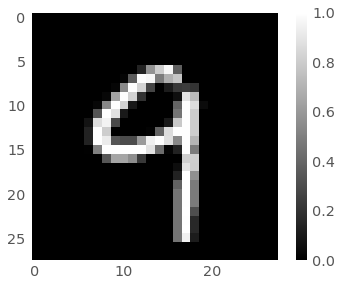

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


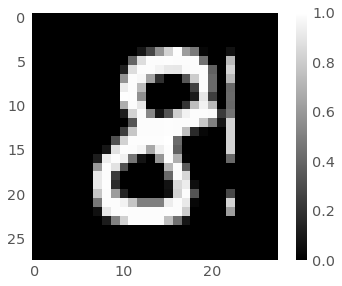

In [278]:
import matplotlib.pyplot as plt

for i in range(0,10):
    print(Y_train[i])
    plt.imshow(X_train[i].reshape((28,28)), cmap='gray', vmin=0, vmax=1)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [279]:
g_train=tf.Graph()

with g_train.as_default():
    X = tf.placeholder(tf.float32, [None, 784]) #placeholder para datos de imagenes
    W = tf.Variable(tf.zeros([784, 10])) #inicializada como ceros
    b = tf.Variable(tf.zeros([10])) #inicializada como ceros
    
    init = tf.global_variables_initializer()
    
    Y_predict = tf.nn.softmax(tf.matmul(X, W) + b) # modelo
    Y_actual = tf.placeholder(tf.float32, [None, 10]) # placeholder para etiquetas, cada una es un vector
    

    cross_entropy = -tf.reduce_sum(Y_actual * tf.log(Y_predict)) # function de error/costo/pérdida
    
    is_correct = tf.equal(tf.argmax(Y_predict,axis=1), tf.argmax(Y_actual,axis=1)) #indices de valores maximos 
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) #porcentaje de predicciones correctas
    
    optimizer = tf.train.GradientDescentOptimizer(0.003) #taza de aprendizaje = 0.003
    train_step = optimizer.minimize(cross_entropy) #función a minimizar con el algoritmo de descenso

train_accuracy=[]
train_loss=[]

with tf.Session(graph=g_train) as sess:
    init.run()
    
    for i in range(200): #200 iteraciones de entrenamiento
        batch_X, batch_Y = mnist.train.next_batch(100) #entrenamos con un mini-batch de 100 datos
        train_data={X: batch_X, Y_actual: batch_Y}

        # entrenar y evaluar
        _,acc,loss=sess.run([train_step,accuracy,cross_entropy], feed_dict=train_data)
        train_accuracy.append(acc)
        train_loss.append(loss)

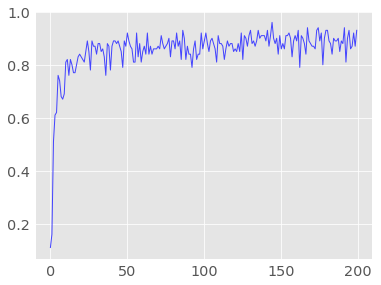

In [280]:
plt.plot(train_accuracy)
plt.show()

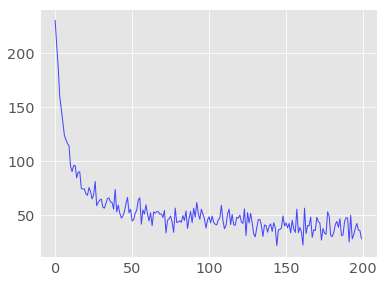

In [281]:
plt.plot(train_loss)
plt.show()

Observamos que hicimos 200 iteraciones sobre conjuntos de 100 datos,i.e. evaluamos un total de 20,000 elementos de la base de datos. Esto no es suficiente para cubrir por completo el conjunto de entrenamiento. Lo que deseamos es iterar sobre toda la base de datos (de entrenamiento) al menos una sola vez.A cada iteración sobre todos los datos de entrenamiento se le llama **época**.

A continuación veremos un ejemplo de código más complicado, donde entrenamos el mismo modelo, pero sobre 20 épocas. Al finalizar cada una, calculamos el error y la pérdida sobre los conjuntos de entrenamiento, prueba y validación.

A sí mismo, a cada nodo en la gráfica de operaciones, añadiremos una operación de análisis (tf.summary). Esto sirve para después poder visualizar el comportamiento de las variables con tensorboard u otras herramientas.

In [282]:
g_train2=tf.Graph()
with g_train2.as_default():

    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, [None, 784],name='x_data') 
        Ydata = tf.placeholder(tf.float32, [None, 10],name='y_data') 
    
    with tf.name_scope("fitting_variables"):
        with tf.name_scope("weights"):
            W = tf.Variable(tf.ones([10,784]),name='w')
            tf.summary.histogram("wieghts",W)
        with tf.name_scope("bias"):
            b = tf.Variable(tf.ones([10]),name='b')
            tf.summary.histogram("biases",b)
    
    prod=tf.matmul(W,X,transpose_b=True) #transponemos X que cada dato sea una columna
    sumation=tf.transpose(tf.transpose(prod) + b) #sumar b verticalmente con broadcasting
    
    with tf.name_scope("outputs"):
        with tf.name_scope("model_output"):
            Ymod = tf.nn.softmax(tf.transpose(sumation),name="y_mod") 
        with tf.name_scope("cross_entropy"):
            cross_entropy = tf.reduce_mean(-tf.reduce_sum(Ydata * tf.log(Ymod), reduction_indices=[1])) 
            tf.summary.scalar("cross_entropy",cross_entropy)
            
        train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
        correct_prediction = tf.equal(tf.argmax(Ymod,1), tf.argmax(Ydata,1)) 
        
        with tf.name_scope("accuracy"):
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
            tf.summary.scalar("accuracy",accuracy)

In [283]:
batch_size=100
no_of_epochs=20

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True

with tf.Session(graph=g_train2) as sess2:
    
    summaries_dir="test_logs/"
    #writer = tf.summary.FileWriter(summaries_dir,sess2.graph)
    train_writer = tf.summary.FileWriter(summaries_dir + '/train',sess2.graph)
    valid_writer = tf.summary.FileWriter(summaries_dir + '/valid')
    test_writer = tf.summary.FileWriter(summaries_dir + '/test')

    merged=tf.summary.merge_all()
    #test_writer = tf.summary.FileWriter(summaries_dir)
    
    tf.global_variables_initializer().run()
    #calculo inicial de accuracy, perdida,etc.
    summary,loss=sess2.run([merged,cross_entropy],feed_dict={X: mnist.train.images,Ydata: mnist.train.labels})
    train_writer.add_summary(summary, 0)
    #print("Epoch:=",0,"; \t Epoch Loss:=",loss)
    
    summary,t_acc=sess2.run([merged,accuracy], feed_dict={X: mnist.train.images, Ydata: mnist.train.labels})#calculates accuracy across all data
    train_writer.add_summary(summary, 0)
    #print("Training Accuracy is", t_acc*100,"%")
    summary,v_acc=sess2.run([merged,accuracy], feed_dict={X: mnist.validation.images,Ydata:mnist.validation.labels})
    valid_writer.add_summary(summary,0)
    #print("Validation Accuracy is", v_acc*100,"%")
    summary,f_acc=sess2.run([merged,accuracy], feed_dict={X: mnist.test.images,Ydata:mnist.test.labels})
    test_writer.add_summary(summary,0)
    #print("Test Accuracy is", f_acc*100,"%")
    
    sum_data=np.array([0,loss,t_acc,v_acc,f_acc]) #agregar los datos de la epoca 0 en una lista
    
    for epoch in range(no_of_epochs):
        epoch_loss=0
        for i in range(int(mnist.train.num_examples/batch_size)): #dividir 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            train,loss=sess2.run([train_step,cross_entropy], feed_dict={X: batch_xs, Ydata: batch_ys})
            #calcular gradiente y pérdida sobre los datos del batch (se usan todas la variables de la gráfica)
            epoch_loss+=loss #calcula la pérdida por cada batch y la suma para tener la pérdida final en toda la época
        
        #print("Epoch:=",epoch+1,"; \t Epoch Loss:=",epoch_loss)
        summary,t_acc=sess2.run([merged,accuracy], feed_dict={X: mnist.train.images, Ydata: mnist.train.labels})#calculates accuracy across all data
        train_writer.add_summary(summary, epoch+1)
        #print("Training Accuracy is", t_acc*100,"%")
        summary,v_acc=sess2.run([merged,accuracy], feed_dict={X: mnist.validation.images,Ydata:mnist.validation.labels})
        valid_writer.add_summary(summary, epoch+1)
        #print("Validation Accuracy is", v_acc*100,"%")
        summary,f_acc=sess2.run([merged,accuracy], feed_dict={X: mnist.test.images,Ydata:mnist.test.labels})
        test_writer.add_summary(summary, epoch+1)
        #print("Test Accuracy is", f_acc*100,"%")
        
        sum_data=np.vstack((sum_data,np.array([epoch+1,epoch_loss,t_acc,v_acc,f_acc])))
        print("Finished Epoch",epoch+1)

Exception ignored in: <function BaseSession.__del__ at 0x7f26b76531e0>
Traceback (most recent call last):
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 736, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'
Exception ignored in: <function BaseSession.__del__ at 0x7f26b76531e0>
Traceback (most recent call last):
  File "/home/arturo/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py", line 736, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'


Finished Epoch 1
Finished Epoch 2
Finished Epoch 3
Finished Epoch 4
Finished Epoch 5
Finished Epoch 6
Finished Epoch 7
Finished Epoch 8
Finished Epoch 9
Finished Epoch 10
Finished Epoch 11
Finished Epoch 12
Finished Epoch 13
Finished Epoch 14
Finished Epoch 15
Finished Epoch 16
Finished Epoch 17
Finished Epoch 18
Finished Epoch 19
Finished Epoch 20


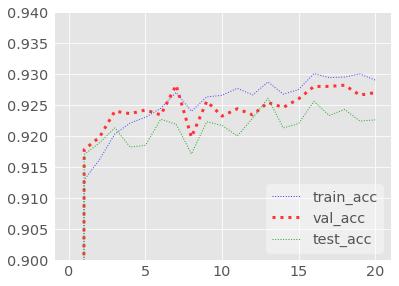

In [284]:
#plt.plot(sum_data[:,0],sum_data[:,1],label="epoch_loss")
plt.ylim(0.9,0.94)
plt.plot(sum_data[:,0],sum_data[:,2],label="train_acc",ls=':')
plt.plot(sum_data[:,0],sum_data[:,3],label="val_acc",ls=':')
plt.plot(sum_data[:,0],sum_data[:,4],label="test_acc",ls=':')
plt.legend()
plt.show()
#test and validationa accuracy get stuck over time(overfitting) 
#the optimal no of epoch seems to be around 10-15 epochs

# Guardar y Cargar Modelos Entrenados

In [285]:
#saving
W = tf.Variable([[1,2,3],[1,2,3]],dtype=tf.float32,name='s_weights')
b = tf.Variable([[1,2,3]],dtype=tf.float32,name='s_biases')

init=tf.global_variables_initializer()
saver= tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    save_path=saver.save(sess,"test/my_nn_savefile.ckpt")
    print("Save to",save_path)
    
tf.reset_default_graph()

Save to test/my_nn_savefile.ckpt


In [286]:
#restoring
W=tf.Variable(tf.zeros([2,3]),dtype=tf.float32,name='s_weights')
b=tf.Variable(tf.zeros([1,3]),dtype=tf.float32,name='s_biases')

saver=tf.train.Saver()
# Add ops to save and restore only `b` using the name "b"
#saver = tf.train.Saver({"b": b})
#we'll have to initialize W since saver does not do that

with tf.Session() as sess:
    saver.restore(sess,"test/my_nn_savefile.ckpt")
    print("weights:",sess.run(W))
    print("biases:",sess.run(b))

INFO:tensorflow:Restoring parameters from test/my_nn_savefile.ckpt
weights: [[1. 2. 3.]
 [1. 2. 3.]]
biases: [[1. 2. 3.]]


# Un Ejemplo con Keras

Comparemos el código que generamos con el que utiliza la librería Keras (API de alto nivel).

In [2]:
import tensorflow as tf
mnist_keras = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist_keras.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape #no separa el conjunto de validación

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x_train[0] #las matrices ahora tienen valores enteros, i.e. no estan normalizadas

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


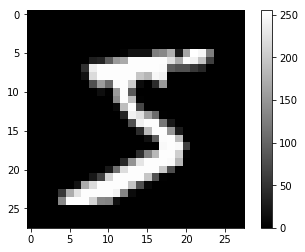

0


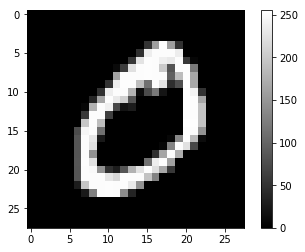

4


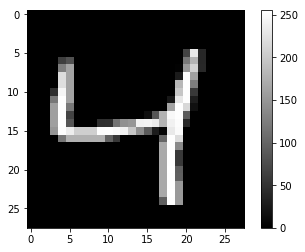

1


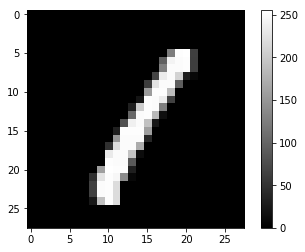

9


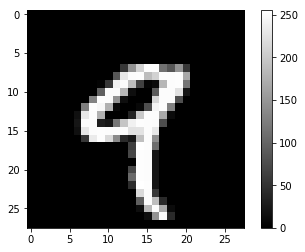

2


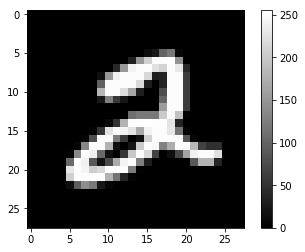

1


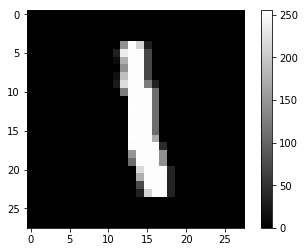

3


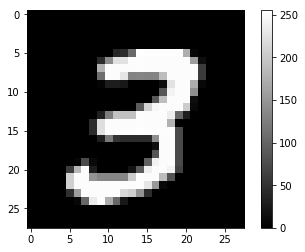

1


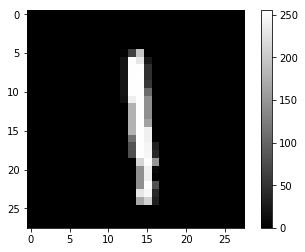

4


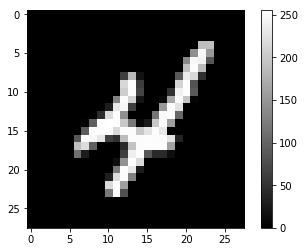

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,10):
    print(y_train[i]) #las entradas no estan en formato one-hot
    plt.imshow(x_train[i], cmap='gray', vmin=0, vmax=255) #los valores no estan normalizados
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
tf.reset_default_graph()
(x_train, y_train),(x_test, y_test) = mnist_keras.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalizamos los datos

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4703 - acc: 0.8779
Epoch 2/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3040 - acc: 0.9153
Epoch 3/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2832 - acc: 0.9209
Epoch 4/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2733 - acc: 0.9238
Epoch 5/5
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2672 - acc: 0.9251


[0.26716283404529095, 0.9251]

# Referencias

- [Python Programming Language: Tensorflow Datatypes](https://pythonprogramminglanguage.com/tensorflow-datatypes/)
- [Tensorflow Documentation: Introduction to Low-Level APIs](https://www.tensorflow.org/guide/low_level_intro)
- [Tensorflow Documentation: Graphs and Sessions](https://www.tensorflow.org/guide/graphs)
- [Distributed Tensorflow](https://github.com/tensorflow/examples/blob/master/community/en/docs/deploy/distributed.md)
- [Towards Data Science: Demystifying Cross-Entropy](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8)
- [Martin Gorner: Tensorflow Without a PHD](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0)
- [Adam W. Harley: An Interactive Node-Link Visualization of Convolutional Neural Networks](http://scs.ryerson.ca/~aharley/vis/)